#Health Care Facility Accessibility: Logistic Regression Model

Using datasets of healthcare facilities and the population distribution across cities in Sudan, we aim to investigate the accessibility of healthcare facilities based on the geographic locations of both the cities and the facilities.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
pd.set_option('display.max_rows', 500)

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p '/content/drive/MyDrive/Omdena/Sudan/Modeling/'
%cd '/content/drive/MyDrive/Omdena/Sudan/Modeling/'

Mounted at /content/drive
/content/drive/MyDrive/Omdena/Sudan/Modeling


Data source:  
https://github.com/OmdenaAI/SudanChapter_AnalyzeHealthcareAccessibility/blob/main/04_Data_analysis/final_data_folder/final_healthcare_facility_dataset.csv

In [3]:
df_health = pd.read_csv("/content/drive/MyDrive/Omdena/Sudan/Modeling/final_healthcare_facility_dataset.csv")

In [4]:
df_health.head()

,Unnamed: 0,name,amenity,addr_city,osm_id,osm_type,geometry,name_english,Latitude,Longitude,City,State
0,0,صيدلية الاوركيدة,pharmacy,NaN,7069338988,nodes,POINT (32.4916878 15.4509373),Orchid Pharmacy,15.450937,32.491688,Khartoum,Khartoum
1,1,صيدلية ابو المقداد 9,pharmacy,NaN,7066463168,nodes,POINT (32.489563 15.4430628),Abu Al-Muqdad Pharmacy 9,15.443063,32.489563,Khartoum,Khartoum
2,2,صيدلية اواب,pharmacy,NaN,7066472417,nodes,POINT (32.4903107 15.4404373),Awab Pharmacy,15.440437,32.490311,Khartoum,Khartoum
3,3,صيدلية التفاح الاخضر,pharmacy,NaN,6898081298,nodes,POINT (32.6189537 15.5984329),Green Apple Pharmacy,15.598433,32.618954,Khartoum,Khartoum
4,4,Africa pharmcy,pharmacy,NaN,4548525889,nodes,POINT (32.5694639 15.5330492),Africa pharmcy,15.533049,32.569464,Khartoum,Khartoum


Data source:  
https://github.com/OmdenaAI/SudanChapter_AnalyzeHealthcareAccessibility/blob/main/04_Data_analysis/final_data_folder/population-by-cities-data.csv

In [5]:
df_pop = pd.read_csv("/content/drive/MyDrive/Omdena/Sudan/EDA/demographics/population-by-cities-data.csv")

In [6]:
df_pop.head()

,city,country,pop2024,latitude,longitude
0,Khartoum,Sudan,1974647,15.5518,32.5324
1,Omdurman,Sudan,1200000,15.6445,32.4777
2,Nyala,Sudan,565734,12.0489,24.8807
3,Port Sudan,Sudan,489725,19.6175,37.2164
4,Kassala,Sudan,401477,15.4510,36.4000


In [7]:
df_health.rename({'City':'city'}, axis = 1, inplace=True) # Rename a variable

In [8]:
df_hp = df_health.merge(df_pop, on = 'city', how="left") # Merge health dataset and population dataset

In [9]:
df_hp.head()

,Unnamed: 0,name,amenity,addr_city,osm_id,osm_type,geometry,name_english,Latitude,Longitude,city,State,country,pop2024,latitude,longitude
0,0,صيدلية الاوركيدة,pharmacy,NaN,7069338988,nodes,POINT (32.4916878 15.4509373),Orchid Pharmacy,15.450937,32.491688,Khartoum,Khartoum,Sudan,1974647,15.5518,32.5324
1,1,صيدلية ابو المقداد 9,pharmacy,NaN,7066463168,nodes,POINT (32.489563 15.4430628),Abu Al-Muqdad Pharmacy 9,15.443063,32.489563,Khartoum,Khartoum,Sudan,1974647,15.5518,32.5324
2,2,صيدلية اواب,pharmacy,NaN,7066472417,nodes,POINT (32.4903107 15.4404373),Awab Pharmacy,15.440437,32.490311,Khartoum,Khartoum,Sudan,1974647,15.5518,32.5324
3,3,صيدلية التفاح الاخضر,pharmacy,NaN,6898081298,nodes,POINT (32.6189537 15.5984329),Green Apple Pharmacy,15.598433,32.618954,Khartoum,Khartoum,Sudan,1974647,15.5518,32.5324
4,4,Africa pharmcy,pharmacy,NaN,4548525889,nodes,POINT (32.5694639 15.5330492),Africa pharmcy,15.533049,32.569464,Khartoum,Khartoum,Sudan,1974647,15.5518,32.5324


In [10]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1129 non-null   int64  
 1   name          1092 non-null   object 
 2   amenity       1109 non-null   object 
 3   addr_city     22 non-null     object 
 4   osm_id        1129 non-null   int64  
 5   osm_type      1129 non-null   object 
 6   geometry      1129 non-null   object 
 7   name_english  1092 non-null   object 
 8   Latitude      1129 non-null   float64
 9   Longitude     1129 non-null   float64
 10  city          1129 non-null   object 
 11  State         1129 non-null   object 
 12  country       1129 non-null   object 
 13  pop2024       1129 non-null   int64  
 14  latitude      1129 non-null   float64
 15  longitude     1129 non-null   float64
dtypes: float64(4), int64(3), object(9)
memory usage: 141.3+ KB


Rename some variables

In [11]:
df_hp.rename({'Latitude':'latitude_h', 'Longitude':'longitude_h', 'latitude': 'latitude_p', 'longitude':'longitude_p'}, axis = 1, inplace=True)

Drop some variables

In [12]:
df_hp.drop(["name", "Unnamed: 0", "addr_city", "geometry", "osm_type", "osm_id", "country", "name_english"], inplace = True, axis = 1)

In [13]:
df_hp.head()

,amenity,latitude_h,longitude_h,city,State,pop2024,latitude_p,longitude_p
0,pharmacy,15.450937,32.491688,Khartoum,Khartoum,1974647,15.5518,32.5324
1,pharmacy,15.443063,32.489563,Khartoum,Khartoum,1974647,15.5518,32.5324
2,pharmacy,15.440437,32.490311,Khartoum,Khartoum,1974647,15.5518,32.5324
3,pharmacy,15.598433,32.618954,Khartoum,Khartoum,1974647,15.5518,32.5324
4,pharmacy,15.533049,32.569464,Khartoum,Khartoum,1974647,15.5518,32.5324


###Calculate the distance between 2 points (city and facility) based on their latitude and longitude coordinates.

In [15]:
from geopy.distance import geodesic

# Function to calculate the distance
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).km

In [16]:
df_hp['distance_km'] = df_hp.apply(
    lambda row: calculate_distance(
        row["latitude_h"], row["longitude_h"], row["latitude_p"], row["longitude_p"]
    ),
    axis=1
)
df_hp

,amenity,latitude_h,longitude_h,city,State,pop2024,latitude_p,longitude_p,distance_km
0,pharmacy,15.450937,32.491688,Khartoum,Khartoum,1974647,15.5518,32.5324,11.985223
1,pharmacy,15.443063,32.489563,Khartoum,Khartoum,1974647,15.5518,32.5324,12.880180
2,pharmacy,15.440437,32.490311,Khartoum,Khartoum,1974647,15.5518,32.5324,13.124169
3,pharmacy,15.598433,32.618954,Khartoum,Khartoum,1974647,15.5518,32.5324,10.621262
4,pharmacy,15.533049,32.569464,Khartoum,Khartoum,1974647,15.5518,32.5324,4.484830
...,...,...,...,...,...,...,...,...,...
1124,clinic,10.147665,27.680586,Al Mijlad,West Kordofan,19997,11.0333,27.7333,98.131357
1125,clinic,10.140073,27.689022,Al Mijlad,West Kordofan,19997,11.0333,27.7333,98.920208
1126,clinic,10.286603,27.876148,Al Mijlad,West Kordofan,19997,11.0333,27.7333,84.059568
1127,clinic,10.287354,27.878661,Al Mijlad,West Kordofan,19997,11.0333,27.7333,84.029595


###Check missing data

In [17]:
# function to check missing data
def null_agg_percent(df):
    agg = df_hp.isnull().sum().sort_values(ascending = False)
    percent = (df_hp.isnull().sum()/len(df)).sort_values(ascending = False)

    agg_percent = pd.DataFrame({"aggregate":agg, "percent": percent}).reset_index()
    agg_percent.columns = ["Column_Name","aggregate", "percent"]
    return agg_percent

In [18]:
null_agg_percent(df_hp)

,Column_Name,aggregate,percent
0,amenity,20,0.017715
1,latitude_h,0,0.000000
2,longitude_h,0,0.000000
3,city,0,0.000000
4,State,0,0.000000
5,pop2024,0,0.000000
6,latitude_p,0,0.000000
7,longitude_p,0,0.000000
8,distance_km,0,0.000000


'amenity' has 1.7% of missing values.

In [19]:
df_hp[df_hp['amenity'].isnull()]

,amenity,latitude_h,longitude_h,city,State,pop2024,latitude_p,longitude_p,distance_km
73,NaN,14.427580,33.500046,Wad Medani,Gezira,332714,14.4012,33.5199,3.619844
74,NaN,15.643179,32.484428,Omdurman,Khartoum,1200000,15.6445,32.4777,0.736056
92,NaN,15.013706,33.097394,Al Hilaliyya,Al Jazirah,17345,14.9398,33.2340,16.815913
96,NaN,15.646511,32.501708,Omdurman,Khartoum,1200000,15.6445,32.4777,2.583753
178,NaN,15.530687,32.677063,Khartoum,Khartoum,1974647,15.5518,32.5324,15.693612
340,NaN,15.525046,32.498277,Khartoum,Khartoum,1974647,15.5518,32.5324,4.707845
539,NaN,15.623813,32.543686,Omdurman,Khartoum,1200000,15.6445,32.4777,7.436563
540,NaN,15.566572,32.563350,Khartoum,Khartoum,1974647,15.5518,32.5324,3.700464
541,NaN,15.577111,32.570552,Khartoum,Khartoum,1974647,15.5518,32.5324,4.958995
673,NaN,15.546857,32.558869,Khartoum,Khartoum,1974647,15.5518,32.5324,2.891548


Impute the missing value with fillna() mode in 'amenity'.

In [20]:
most_frequent_value = df_hp['amenity'].mode()[0]
df_hp['amenity'] = df_hp['amenity'].fillna(most_frequent_value)

### Label each data point as accessible (1) or not (0) based on whether the distance is within the threshold

In [21]:
threshold_km = 5  # let say within 5km
df_hp['Accessibility'] = df_hp['distance_km'].apply(
    lambda row: 1 if row <= threshold_km else 0
)
df_hp

,amenity,latitude_h,longitude_h,city,State,pop2024,latitude_p,longitude_p,distance_km,Accessibility
0,pharmacy,15.450937,32.491688,Khartoum,Khartoum,1974647,15.5518,32.5324,11.985223,0
1,pharmacy,15.443063,32.489563,Khartoum,Khartoum,1974647,15.5518,32.5324,12.880180,0
2,pharmacy,15.440437,32.490311,Khartoum,Khartoum,1974647,15.5518,32.5324,13.124169,0
3,pharmacy,15.598433,32.618954,Khartoum,Khartoum,1974647,15.5518,32.5324,10.621262,0
4,pharmacy,15.533049,32.569464,Khartoum,Khartoum,1974647,15.5518,32.5324,4.484830,1
...,...,...,...,...,...,...,...,...,...,...
1124,clinic,10.147665,27.680586,Al Mijlad,West Kordofan,19997,11.0333,27.7333,98.131357,0
1125,clinic,10.140073,27.689022,Al Mijlad,West Kordofan,19997,11.0333,27.7333,98.920208,0
1126,clinic,10.286603,27.876148,Al Mijlad,West Kordofan,19997,11.0333,27.7333,84.059568,0
1127,clinic,10.287354,27.878661,Al Mijlad,West Kordofan,19997,11.0333,27.7333,84.029595,0


**1: Accessible, 0: Not accessible**

In [22]:
df_hp['Accessibility'].value_counts()

,count
Accessibility,
0,697
1,432


In [28]:
round(df_hp['Accessibility'].value_counts(normalize=True) * 100,2)

,proportion
Accessibility,
0,61.74
1,38.26


In [29]:
df_hp[['Accessibility', 'city']].value_counts()

Accessibility  city        
0              Khartoum        382
               Omdurman        268
1              Khartoum        202
               Omdurman        169
               Al Hasaheisa     15
0              Al Mijlad        13
1              El Daein         13
               Kassala           8
               Wad Medani        7
0              Wad Rawah         5
               Geneina           5
1              Port Sudan        3
               Dongola           3
               Atbara            3
0              Ad Dabbah         3
               Argo              3
               Al Hilaliyya      3
               Zalingei          3
1              Ar Rahad          2
0              Al Hasaheisa      2
               Al Kawa           2
1              Merowe            2
0              Al Hawatah        2
               Sinnar            2
               Nyala             1
1              Al Manaqil        1
               An Nuhud          1
0              Marabba           1
               Barah             1
1              Geneina           1
0              Al Manaqil        1
1              Kuraymah          1
               Ad Dabbah         1
Name: count, dtype: int64

In [30]:
df_hp[['amenity', 'Accessibility', 'city']].value_counts()

amenity   Accessibility  city        
pharmacy  0              Khartoum        307
                         Omdurman        222
          1              Khartoum        166
                         Omdurman        136
hospital  0              Khartoum         29
clinic    0              Khartoum         29
                         Omdurman         28
hospital  1              Omdurman         16
pharmacy  1              Al Hasaheisa     14
clinic    0              Al Mijlad        13
hospital  1              Khartoum         12
clinic    1              Khartoum         12
                         Omdurman         12
dentist   0              Khartoum         11
hospital  0              Omdurman         11
dentist   1              Khartoum         10
doctors   0              Khartoum          6
clinic    1              El Daein          6
pharmacy  1              Wad Medani        6
hospital  0              Geneina           4
doctors   0              Omdurman          4
pharmacy  1              El Daein          4
                         Kassala           4
hospital  1              Atbara            3
pharmacy  0              Wad Rawah         3
hospital  1              Port Sudan        3
          0              Ad Dabbah         3
dentist   1              Omdurman          3
          0              Omdurman          3
clinic    0              Al Hawatah        2
          1              Ar Rahad          2
hospital  1              Kassala           2
doctors   1              Dongola           2
hospital  1              El Daein          2
pharmacy  0              Al Hilaliyya      2
hospital  0              Zalingei          2
clinic    1              Kassala           2
          0              Argo              2
doctors   1              Omdurman          2
                         Khartoum          2
clinic    0              Al Kawa           2
hospital  1              Merowe            2
clinic    0              Nyala             1
                         Sinnar            1
          1              Ad Dabbah         1
pharmacy  0              Sinnar            1
clinic    0              Geneina           1
                         Wad Rawah         1
                         Zalingei          1
                         Barah             1
hospital  1              Wad Medani        1
doctors   0              Al Hasaheisa      1
clinic    1              An Nuhud          1
hospital  1              Kuraymah          1
clinic    1              Dongola           1
hospital  1              Al Manaqil        1
                         Al Hasaheisa      1
          0              Wad Rawah         1
                         Marabba           1
                         Argo              1
                         Al Manaqil        1
                         Al Hasaheisa      1
clinic    0              Al Hilaliyya      1
doctors   1              El Daein          1
hospital  1              Geneina           1
Name: count, dtype: int64

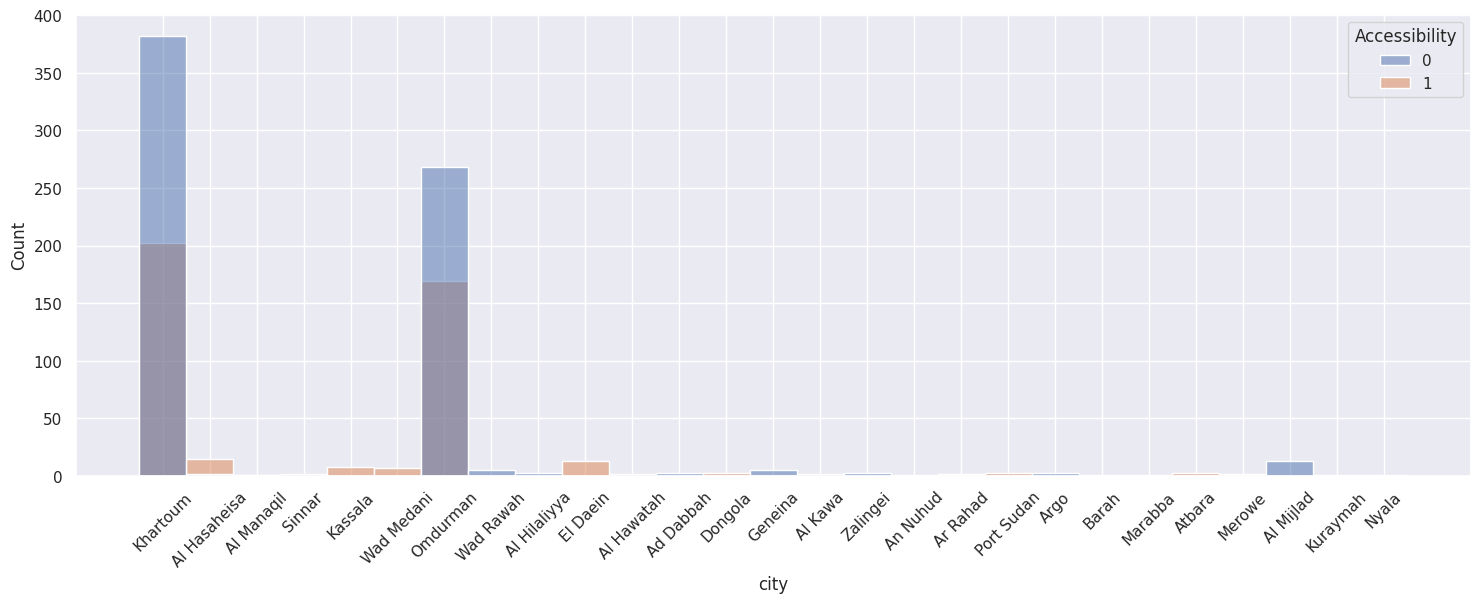

In [31]:
plt.figure(figsize=(18, 6))
sns.histplot(data=df_hp, x="city", hue="Accessibility")
plt.xticks(rotation=45)
plt.show()

In [32]:
df_hp['Accessibility'].isnull().sum()

0

In [33]:
# Deep copy
df = df_hp.copy()

In [34]:
# Create y(dependent variable)
y = df['Accessibility']
# Drop the dependent variable from the dataframe and create the X(independent variable)
X = df.drop(['Accessibility', "city", "State"], axis=1, inplace = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   amenity      1129 non-null   object 
 1   latitude_h   1129 non-null   float64
 2   longitude_h  1129 non-null   float64
 3   pop2024      1129 non-null   int64  
 4   latitude_p   1129 non-null   float64
 5   longitude_p  1129 non-null   float64
 6   distance_km  1129 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 61.9+ KB


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Create dummy variables for the categorical variables
X = pd.get_dummies(df,columns = df.select_dtypes(include = ["object"]).columns.tolist(), drop_first = True)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude_h        1129 non-null   float64
 1   longitude_h       1129 non-null   float64
 2   pop2024           1129 non-null   int64  
 3   latitude_p        1129 non-null   float64
 4   longitude_p       1129 non-null   float64
 5   distance_km       1129 non-null   float64
 6   amenity_dentist   1129 non-null   bool   
 7   amenity_doctors   1129 non-null   bool   
 8   amenity_hospital  1129 non-null   bool   
 9   amenity_pharmacy  1129 non-null   bool   
dtypes: bool(4), float64(5), int64(1)
memory usage: 57.5 KB


In [39]:
X.head()

,latitude_h,longitude_h,pop2024,latitude_p,longitude_p,distance_km,amenity_dentist,amenity_doctors,amenity_hospital,amenity_pharmacy
0,15.450937,32.491688,1974647,15.5518,32.5324,11.985223,False,False,False,True
1,15.443063,32.489563,1974647,15.5518,32.5324,12.880180,False,False,False,True
2,15.440437,32.490311,1974647,15.5518,32.5324,13.124169,False,False,False,True
3,15.598433,32.618954,1974647,15.5518,32.5324,10.621262,False,False,False,True
4,15.533049,32.569464,1974647,15.5518,32.5324,4.484830,False,False,False,True


In [40]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [41]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Accessible', 'Not Accessible'], yticklabels=['Accessible', 'Not Accessible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [42]:
#scale the feature data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)  #to prevent data leakage, we will only transform but not fit the test data.

In [43]:
# Defining the Logistic regression model
lr = LogisticRegression(class_weight= {0: .2, 1: .8},random_state =1)
# Fitting the model on the training data
lr.fit(X_train_std, y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      0.61      0.76       489
           1       0.61      1.00      0.76       301

    accuracy                           0.76       790
   macro avg       0.81      0.81      0.76       790
weighted avg       0.85      0.76      0.76       790



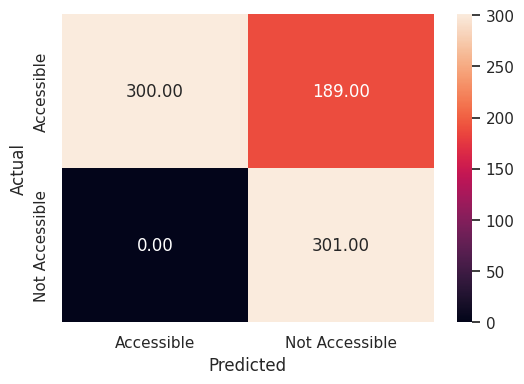

In [44]:
#Predict for train set
y_train_pred = lr.predict(X_train_std)
#checking the performance on the train dataset
metrics_score(y_train, y_train_pred)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       1.00      0.60      0.75       208
           1       0.61      1.00      0.76       131

    accuracy                           0.76       339
   macro avg       0.81      0.80      0.76       339
weighted avg       0.85      0.76      0.75       339



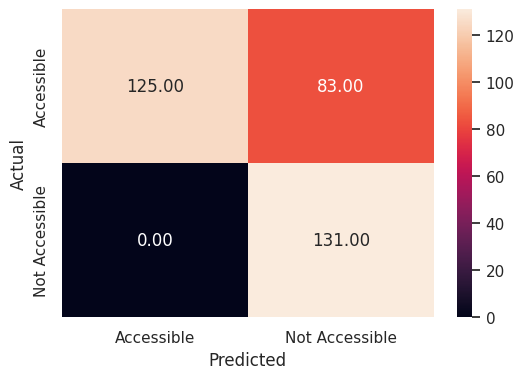

In [45]:
#Predict for test set
y_test_pred = lr.predict(X_test_std)
#checking the performance on the test dataset
metrics_score(y_test, y_test_pred)

#### Let's check the coefficients, and check which variables are important and how they affect the accessibility

In [46]:
# Printing the coefficients of logistic regression
coef = pd.DataFrame(zip(X_train.columns, np.transpose(lr.coef_.tolist()[0])), columns=['features', 'coef'])
coef.sort_values(by = 'coef', ascending = False)

,features,coef
4,longitude_p,0.303914
3,latitude_p,0.293202
6,amenity_dentist,0.114135
9,amenity_pharmacy,0.064095
8,amenity_hospital,0.017162
7,amenity_doctors,-0.004309
2,pop2024,-0.173648
1,longitude_h,-0.330479
0,latitude_h,-0.427247
5,distance_km,-7.166871


**Insights**  
<font color = blue> Positive impact:</font>  
longitude_p	0.303914  
latitude_p	0.293202  
amenity_dentist	0.114135  
amenity_pharmacy	0.064095  
amenity_hospital	0.017162  

<font color = blue> Negative impact:</font>  
amenity_doctors	-0.004309  
pop2024	-0.173648  
longitude_h	-0.330479  
latitude_h	-0.427247  
distance_km	<font color = red> -7.166871 </font>   


The number of facilities, as well as 'longitude_p' and 'latitude_p', have a positive impact on accessibility. In contrast, 'distance_km', 'latitude_h', and 'longitude_h' exhibit a strong negative impact on accessibility.








In [47]:
#plot precision-recall curve to help find the optimal threshold
from sklearn.metrics import precision_recall_curve

In [48]:
# Change the threshold of the classifier, in order to do that we need the prediction output to be probability.
lr_mod = LogisticRegression(class_weight= {0: .2, 1: .8},random_state =1)
lr_mod.fit(X_train_std,y_train)
THRESHOLD = 0.50
y_test_pred_mod = lr_mod.predict_proba(X_test_std)[:,1]
y_test_pred_mod_cl = np.where(y_test_pred_mod>THRESHOLD,1,0)

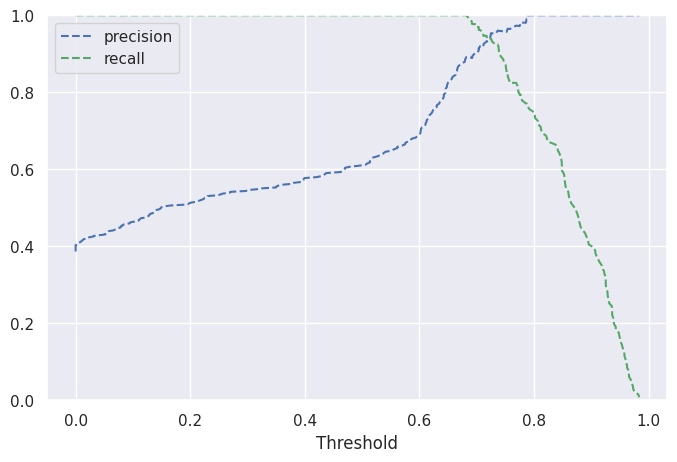

In [49]:
# Plot values of precisions, recalls, and thresholds
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_test, y_test_pred_mod)

plt.figure(figsize = (8, 5))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'upper left')

plt.ylim([0, 1])
plt.show()

**Insights**  
A threshold of 0.73 represents the best balance between precision and recall to optimize performance.

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       208
           1       0.95      0.92      0.94       131

    accuracy                           0.95       339
   macro avg       0.95      0.95      0.95       339
weighted avg       0.95      0.95      0.95       339



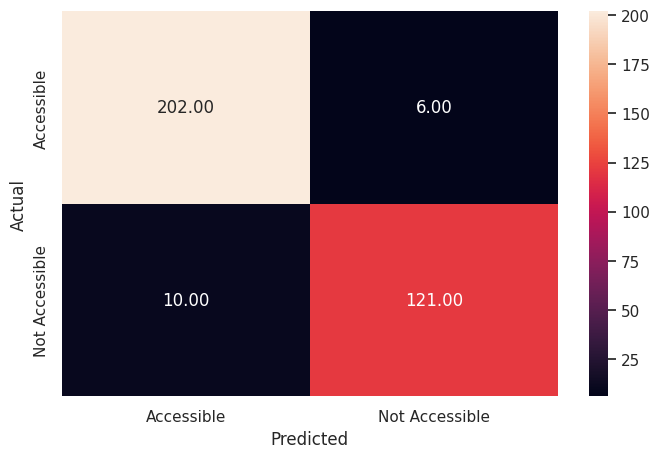

In [ ]:
#if we use 0.73 as the threshold
lr_mod_70 = LogisticRegression(class_weight= {0: .2, 1: .8},random_state =1)
lr_mod_70.fit(X_train_std,y_train)
THRESHOLD = 0.73
y_test_pred_mod_70 = np.where(lr_mod_70.predict_proba(X_test_std)[:,1]>THRESHOLD,1,0)
metrics_score(y_test, y_test_pred_mod_70)

**Insights**    
<ins>Precision:</ins>    
0: 0.95  
1: 0.95  
Precision shows percentage of actual True in the prediction as True.  
The precisions of both class0 and class1 are 0.95. That means both classes have high precision. That means there is less possibility to occur False Positive.    

<ins>Recall:</ins>  
0: 0.97  
1: 0.92  
Recall shows percentage of predicted actual True when the model predicts correctly.  
It predicts 97% of actual True in class 0. And in class 1, it predicts 92% which is relatively low compared to class 0 but it is still good score because the number of sample calss 1 are less than class 0's. That means there is less possibility to occur False Nagative.    

<ins>F1-score:</ins>  
0: 0.96  
1: 0.94  
F1-score shows the balance of precision and recall. Both F1-score are high.

<ins>Support:</ins>    
0: 208  
1: 131  
Support shows the nmber of actual sample.  
The amount of class 0 are larger than class 1 but even so, class 1 performs well.  

<ins>Accuracy:</ins>    
0.95  
The overall accuracy of the model is 95%  

<ins>Macro Average:</ins>    
0.95  
Macro average shows the average of precision, recall, and F1-score.  

<ins>Weighted Average:</ins>    
0.95  
Weighted average shows the average based on support. So, class 0 provides large impact because the numbers of samples are larger than class 1.  








